# MOBILE MONEY FRAUD DETECTION SYSTEM
Tanzania Context: Mixx (Yas), Airtel Money, M-Pesa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
import joblib

In [2]:
df = pd.read_csv('mobile_money_fraud.csv')
df.head()

,Transaction_Amount,Transaction_Time,Sender_Age,Receiver_New_Account,Location_Risk_Score,Device_Change,Transaction_Frequency,Fraud
0,0.026281,1.681824,1.130532,-2.062538,2.244138,0.214601,0.576699,0
1,-1.481659,0.367523,1.679382,-3.971205,2.645250,0.588726,2.354675,1
2,1.137967,1.442382,-0.082763,1.431158,0.371911,-1.436259,-1.098162,0
3,0.437633,1.726865,-2.925633,1.651078,4.085861,-2.087156,1.045649,0
4,0.436409,-0.280825,3.432624,-2.421213,-0.622075,-2.718039,1.945533,1


In [3]:
X = df.drop('Fraud', axis=1)
y = df['Fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print('Logistic Regression Accuracy:', lr_acc)
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.9108333333333334
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1017
           1       0.80      0.55      0.65       183

    accuracy                           0.91      1200
   macro avg       0.86      0.76      0.80      1200
weighted avg       0.91      0.91      0.90      1200



In [5]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print('Decision Tree Accuracy:', dt_acc)
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.9216666666666666
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1017
           1       0.81      0.63      0.71       183

    accuracy                           0.92      1200
   macro avg       0.87      0.80      0.83      1200
weighted avg       0.92      0.92      0.92      1200



In [6]:
if dt_acc > lr_acc:
    best_model = dt
    print('Best Model: Decision Tree')
else:
    best_model = lr
    print('Best Model: Logistic Regression')

Best Model: Decision Tree


In [7]:
joblib.dump(best_model, 'model.pkl')

['model.pkl']

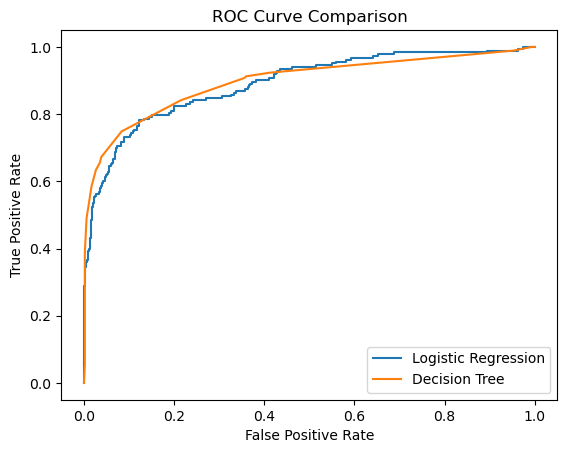

In [8]:
lr_probs = lr.predict_proba(X_test)[:,1]
dt_probs = dt.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.show()